## Model Training
### 1.1) Import Data and reuired packages.
#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings module.

In [56]:
# basic import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Model import
from sklearn.metrics import mean_squared_error , r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge ,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
import warnings


### Import the dataset as pandas dataframe.

In [5]:
df=pd.read_csv("Data/stud.csv")

### Show Top 2 records

In [6]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### Preparing X and Y Variables(Independent and dependent variable)

In [8]:
X=df.drop(columns=['math_score'],axis=1)

In [9]:
X.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88


In [10]:
Y=df['math_score']

In [11]:
Y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [20]:
# Create Column transformer 
num_feature=X.select_dtypes(exclude='object').columns
cat_feature=X.select_dtypes(include='object').columns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
numeric_transformer=StandardScaler()
category_transformer=OneHotEncoder()
preprocessor=ColumnTransformer([("OneHotEncoder",category_transformer,cat_feature),
                                 ( "StandardnScaler",numeric_transformer,num_feature)])


In [21]:
X = preprocessor.fit_transform(X)

In [22]:
X.shape

(1000, 19)

### Split the Training and Test Data set

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((800, 19), (200, 19), (800,), (200,))

### Create an Evaluate Function to give all metrics after model Training

In [30]:
def evaluate_model(actual,predicted):
    msr=mean_squared_error(actual,predicted)
    mae=mean_absolute_error(actual,predicted)
    rmse=np.sqrt(msr)
    r2_square=r2_score(actual,predicted)
    return mae,rmse,r2_square

In [37]:
models={"Linear Regression": LinearRegression(),
        "Lasso": Lasso(),
        "Ridge":Ridge(),
        "K-Neighbour Regressor": KNeighborsRegressor(),
        "DecisionTree": DecisionTreeRegressor(),
        "Random Forest Regressor": RandomForestRegressor()
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    #get the values of model type from models list
    model=list(models.values())[i]
    #train the data set with selected model
    model.fit(X_train,Y_train)
    #predict using selected model
    Y_train_pred=model.predict(X_train)
    Y_test_pred=model.predict(X_test)
    #Evaluate Train and test dataset
    model_train_mae,model_train_rmse,model_train_r2_square=evaluate_model(Y_train,Y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2_square=evaluate_model(Y_test,Y_test_pred)
    #Print the results
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2_square))
    print('----------------------------------')
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2_square))
    r2_list.append(model_test_r2_square)
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbour Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7088
- Mean Absolute Error: 4.5177
- R2 Score: 0.8554
-----------------------

In [46]:
pd.DataFrame(list(zip(model_list,r2_list)), columns=['Model','R2_score']).sort_values(by='R2_score',ascending=False)

,Model,R2_score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.854011
1,Lasso,0.825320
3,K-Neighbour Regressor,0.784030
4,DecisionTree,0.745766


### Linear Regression

In [48]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, Y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(Y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


### Plot Y_pred & Y_test

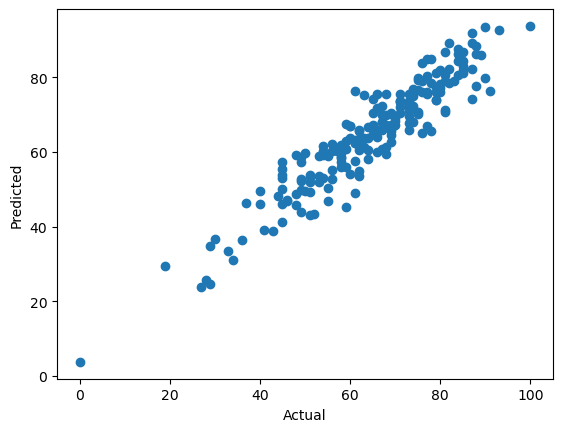

In [57]:
plt.scatter(Y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

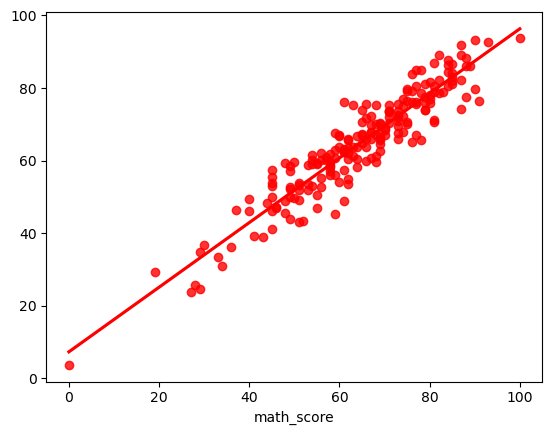

In [52]:
sns.regplot(x=Y_test,y=y_pred,ci=None,color ='red');

### Diffirence between Actual and Predicted Values

In [55]:
pred_df=pd.DataFrame({'Actual Value':Y_test,'Predicted Value':y_pred,'Difference':Y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
